<a href="https://colab.research.google.com/github/laurenwinslett/helloAI/blob/main/penguinforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import numpy as np
import pandas as pd
import tensorflow_decision_forests as tfdf

In [43]:
path = "https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv"
pandas_dataset = pd.read_csv(path)

# Display the first 3 examples.
pandas_dataset.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [44]:
label = "species"

classes = list(pandas_dataset[label].unique())
print(f"Label classes: {classes}")
# >> Label classes: ['Adelie', 'Gentoo', 'Chinstrap']

pandas_dataset[label] = pandas_dataset[label].map(classes.index)


Label classes: ['Adelie', 'Gentoo', 'Chinstrap']


In [45]:
np.random.seed(1)
# Use the ~10% of the examples as the testing set
# and the remaining ~90% of the examples as the training set.
test_indices = np.random.rand(len(pandas_dataset)) < 0.1
pandas_train_dataset = pandas_dataset[~test_indices]
pandas_test_dataset = pandas_dataset[test_indices]

print("Training examples: ", len(pandas_train_dataset))
# >> Training examples: 309

print("Testing examples: ", len(pandas_test_dataset))
# >> Testing examples: 35

Training examples:  309
Testing examples:  35


In [46]:
tf_train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pandas_train_dataset, label=label)
model = tfdf.keras.CartModel()
model.fit(tf_train_dataset)

Use /tmp/tmp0m_mqf4p as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.224641. Found 309 examples.
Training model...
Model trained in 0:00:00.023972
Compiling model...
Model compiled.


In [47]:
tfdf.model_plotter.plot_model_in_colab(model, max_depth=10)

In [48]:
model.compile("accuracy")
print("Train evaluation: ", model.evaluate(tf_train_dataset, return_dict=True))
# >> Train evaluation:  {'loss': 0.0, 'accuracy': 0.96116}

tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pandas_test_dataset, label=label)
print("Test evaluation: ", model.evaluate(tf_test_dataset, return_dict=True))
# >> Test evaluation:  {'loss': 0.0, 'accuracy': 0.97142}


1/1 [==============================] - 0s 233ms/step - loss: 0.0000e+00 - accuracy: 0.9709
Train evaluation:  {'loss': 0.0, 'accuracy': 0.9708737730979919}
1/1 [==============================] - 0s 104ms/step - loss: 0.0000e+00 - accuracy: 0.9714
Test evaluation:  {'loss': 0.0, 'accuracy': 0.9714285731315613}


In [49]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import keras_tuner as kt

def build_model(hp):
  model = tfdf.keras.CartModel(
      min_examples=hp.Choice("min_examples",
          # Try four possible values for "min_examples" hyperparameter.
          # min_examples=10 would limit the growth of the decision tree,
          # while min_examples=1 would lead to deeper decision trees.
         [1, 2, 5, 10]),
      validation_ratio=hp.Choice("validation_ratio",
         # Three possible values for the "validation_ratio" hyperparameter.
         [0.0, 0.05, 0.10]),
      )
  model.compile("accuracy")
  return model

tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    directory="/tmp/tuner",
    project_name="tune_cart")

tuner.search(x=tf_train_dataset, validation_data=tf_test_dataset)
best_model = tuner.get_best_models()[0]

print("Best hyperparameters: ", tuner.get_best_hyperparameters()[0].values)
# >> Best hyperparameters:  {'min_examples': 2, 'validation_ratio': 0.0}

Use /tmp/tmpqm8f73we as temporary training directory
Best hyperparameters:  {'min_examples': 2, 'validation_ratio': 0.0}


In [51]:
model = tfdf.keras.CartModel(min_examples=2, validation_ratio=0.0)
model.fit(tf_train_dataset)

model.compile("accuracy")
print("Test evaluation: ", model.evaluate(tf_test_dataset, return_dict=True))
# >> Test evaluation:  {'loss': 0.0, 'accuracy': 1.0}

Use /tmp/tmpuddtl951 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.301018. Found 309 examples.
Training model...
Model trained in 0:00:00.029912
Compiling model...
Model compiled.


1/1 [==============================] - 0s 154ms/step - loss: 0.0000e+00 - accuracy: 0.9714
Test evaluation:  {'loss': 0.0, 'accuracy': 0.9714285731315613}


In [52]:
tfdf.model_plotter.plot_model_in_colab(model, max_depth=10)

In [63]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import numpy as np
import pandas as pd
import tensorflow_decision_forests as tfdf

In [65]:
path = 'car_evaluation.csv'
pandas_dataset = pd.read_csv(path)

pandas_dataset.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [68]:
label = "vhigh"

classes = list(pandas_dataset[label].unique())
print(f"Label classes: {classes}")
# >> Label classes: ['Adelie', 'Gentoo', 'Chinstrap']

pandas_dataset[label] = pandas_dataset[label].map(classes.index)


Label classes: ['vhigh', 'high', 'med', 'low']


In [66]:
pandas_dataset.shape


(1727, 7)

In [69]:
pandas_dataset.dtypes

vhigh       int64
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object

In [70]:
pandas_dataset.describe()

,vhigh
count,1727.000000
mean,1.500869
std,1.118098
min,0.000000
25%,1.000000
50%,2.000000
75%,2.500000
max,3.000000


In [71]:
pandas_dataset.isnull().mean()

vhigh      0.0
vhigh.1    0.0
2          0.0
2.1        0.0
small      0.0
low        0.0
unacc      0.0
dtype: float64

In [72]:
np.random.seed(1)
# Use the ~10% of the examples as the testing set
# and the remaining ~90% of the examples as the training set.
test_indices = np.random.rand(len(pandas_dataset)) < 0.1
pandas_train_dataset = pandas_dataset[~test_indices]
pandas_test_dataset = pandas_dataset[test_indices]

print("Training examples: ", len(pandas_train_dataset))
# >> Training examples: 309

print("Testing examples: ", len(pandas_test_dataset))
# >> Testing examples: 35

Training examples:  1554
Testing examples:  173


In [73]:
tf_train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pandas_train_dataset, label= 'vhigh')
model = tfdf.keras.CartModel()
model.fit(tf_train_dataset)

Use /tmp/tmpjxxcegg_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.228390. Found 1554 examples.
Training model...
Model trained in 0:00:00.037748
Compiling model...
Model compiled.


In [74]:
tfdf.model_plotter.plot_model_in_colab(model, max_depth=10)

In [75]:
model.compile("accuracy")
print("Train evaluation: ", model.evaluate(tf_train_dataset, return_dict=True))
# >> Train evaluation:  {'loss': 0.0, 'accuracy': 0.96116}

tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pandas_test_dataset, label=label)
print("Test evaluation: ", model.evaluate(tf_test_dataset, return_dict=True))
# >> Test evaluation:  {'loss': 0.0, 'accuracy': 0.97142}

2/2 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.3346
Train evaluation:  {'loss': 0.0, 'accuracy': 0.33462032675743103}
1/1 [==============================] - 0s 172ms/step - loss: 0.0000e+00 - accuracy: 0.2486
Test evaluation:  {'loss': 0.0, 'accuracy': 0.24855491518974304}


In [76]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
import keras_tuner as kt

def build_model(hp):
  model = tfdf.keras.CartModel(
      min_examples=hp.Choice("min_examples",
          # Try four possible values for "min_examples" hyperparameter.
          # min_examples=10 would limit the growth of the decision tree,
          # while min_examples=1 would lead to deeper decision trees.
         [1, 2, 5, 10]),
      validation_ratio=hp.Choice("validation_ratio",
         # Three possible values for the "validation_ratio" hyperparameter.
         [0.0, 0.05, 0.10]),
      )
  model.compile("accuracy")
  return model

tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    directory="/tmp/tuner",
    project_name="tune_cart")

tuner.search(x=tf_train_dataset, validation_data=tf_test_dataset)
best_model = tuner.get_best_models()[0]

print("Best hyperparameters: ", tuner.get_best_hyperparameters()[0].values)
# >> Best hyperparameters:  {'min_examples': 2, 'validation_ratio': 0.0}

Use /tmp/tmpdy2mt0q2 as temporary training directory
Best hyperparameters:  {'min_examples': 2, 'validation_ratio': 0.0}


In [78]:
model = tfdf.keras.CartModel(min_examples=2, validation_ratio=0.0)
model.fit(tf_train_dataset)

model.compile("accuracy")
print("Test evaluation: ", model.evaluate(tf_test_dataset, return_dict=True))
# >> Test evaluation:  {'loss': 0.0, 'accuracy': 1.0}

Use /tmp/tmp4uibk19l as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.715275. Found 1554 examples.
Training model...
Model trained in 0:00:00.083511
Compiling model...
Model compiled.
1/1 [==============================] - 0s 302ms/step - loss: 0.0000e+00 - accuracy: 0.0751
Test evaluation:  {'loss': 0.0, 'accuracy': 0.07514450699090958}


In [79]:
tfdf.model_plotter.plot_model_in_colab(model, max_depth=10)

In [103]:
import pandas as pd


In [114]:
df = pd.read_csv("mushroom.csv")
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [116]:
col=["cap-shape","cap-surface","cap-color","bruises%3F","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat","class"]

In [118]:
for i in col:
    
    print(i,df[i].unique(),df[i].nunique())
    

cap-shape ["b'x'" "b'b'" "b's'" "b'f'" "b'k'" "b'c'"] 6
cap-surface ["b's'" "b'y'" "b'f'" "b'g'"] 4
cap-color ["b'n'" "b'y'" "b'w'" "b'g'" "b'e'" "b'p'" "b'b'" "b'u'" "b'c'" "b'r'"] 10
bruises%3F ["b't'" "b'f'"] 2
odor ["b'p'" "b'a'" "b'l'" "b'n'" "b'f'" "b'c'" "b'y'" "b's'" "b'm'"] 9
gill-attachment ["b'f'" "b'a'"] 2
gill-spacing ["b'c'" "b'w'"] 2
gill-size ["b'n'" "b'b'"] 2
gill-color ["b'k'" "b'n'" "b'g'" "b'p'" "b'w'" "b'h'" "b'u'" "b'e'" "b'b'" "b'r'"
 "b'y'" "b'o'"] 12
stalk-shape ["b'e'" "b't'"] 2
stalk-root ["b'e'" "b'c'" "b'b'" "b'r'" "b'?'"] 5
stalk-surface-above-ring ["b's'" "b'f'" "b'k'" "b'y'"] 4
stalk-surface-above-ring ["b's'" "b'f'" "b'k'" "b'y'"] 4
stalk-surface-below-ring ["b's'" "b'f'" "b'y'" "b'k'"] 4
stalk-color-above-ring ["b'w'" "b'g'" "b'p'" "b'n'" "b'b'" "b'e'" "b'o'" "b'c'" "b'y'"] 9
stalk-color-below-ring ["b'w'" "b'p'" "b'g'" "b'b'" "b'n'" "b'e'" "b'y'" "b'o'" "b'c'"] 9
veil-type ["b'p'"] 1
veil-color ["b'w'" "b'n'" "b'o'" "b'y'"] 4
ring-number ["b'o'" "b't'

In [119]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for i in col:
    df[i]=lr.fit_transform(df[i])


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int64
 1   cap-surface               8124 non-null   int64
 2   cap-color                 8124 non-null   int64
 3   bruises%3F                8124 non-null   int64
 4   odor                      8124 non-null   int64
 5   gill-attachment           8124 non-null   int64
 6   gill-spacing              8124 non-null   int64
 7   gill-size                 8124 non-null   int64
 8   gill-color                8124 non-null   int64
 9   stalk-shape               8124 non-null   int64
 10  stalk-root                8124 non-null   int64
 11  stalk-surface-above-ring  8124 non-null   int64
 12  stalk-surface-below-ring  8124 non-null   int64
 13  stalk-color-above-ring    8124 non-null   int64
 14  stalk-color-below-ring    8124 non-null 

In [121]:
df.describe()


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616,0.482029
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


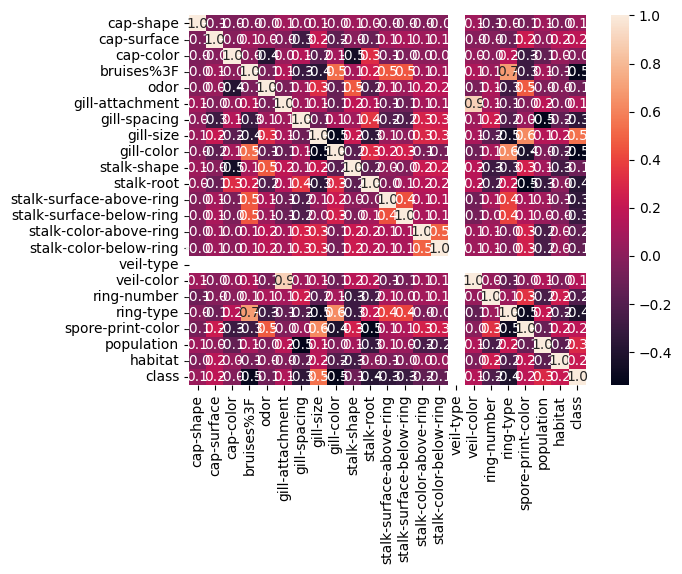

In [122]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr,annot=True, fmt=".1f")
sns.set(rc = {'figure.figsize':(15,15)})


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=df.drop(['class'],axis=1)
Y=df['class']
xtr,xte,ytr,yte=train_test_split(X,Y,test_size=0.3)
rf=RandomForestClassifier()
rf.fit(xtr,ytr)
ypre=rf.predict(xte)

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [125]:
print(accuracy_score(ypre,yte))
print(f1_score(ypre,yte))

1.0
1.0


<Axes: >

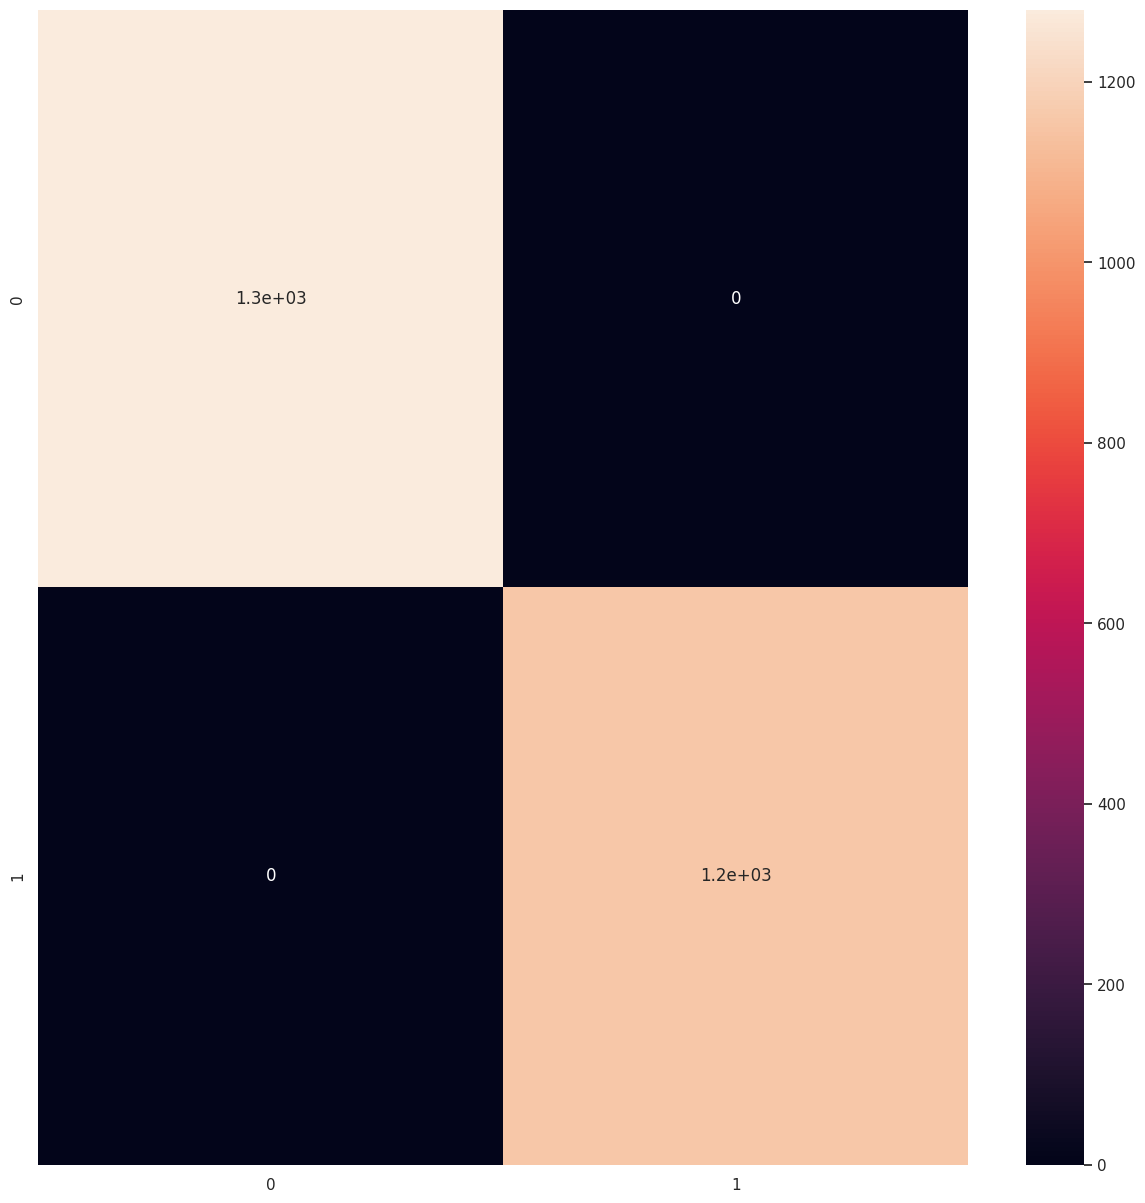

In [126]:
cm=confusion_matrix(ypre,yte)
sns.heatmap(cm,annot=True)
